# **GALAH in Analysis in 6D to allow a fair comparison**
---

In the previous two notebooks we have demonstrated the advantages of GALAH data at producing the cohesion of these structures than the APOGEE dataset through:
- The strong resolution of the Aurora Population in GALAH but not APOGEE
- There visual cohesion across UMAP hyperparameters in GALAH but APOGEE
- The success of GMM reconstructing these populations in GALAH but APOGEE

---
## **Why this isn't yet a fair comparison:**
- However we must invesitgate whether is a result of the GALAH data itself, or the additional dimensions we have used (ie a comparision of 12 vs 6) 
- Ie actually a success of the GALAH data or the additional components that have been added. 

### **Ie in GALAH:**

- We use dimensions which should trace very similair trends: 
    - ie [Y/Fe], [Ba/Fe] both used for `s-process` wheras Ce used once in APOGEE
    - ie [Na/Fe], [Al/Fe] both trace `Odd-Z` elements
- Also there is the additional `r-process` tracer element not avaiable in APOGEE
    - ie Eu

### **Hypothetical Corrections**
If it is is simply a resul of the 12 dimensional case then:
-  we could add duplicated dimemsions to the APOGEE mapping to create a similiar effect of duplicate preformance
    - Ie use [Al/Fe] twice

In [1]:
from analysis import ReducedGMMPipeline
from astropy.table import Table
import numpy as np
from analysis import investigate_umap

# Avoid warnings from umap for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [3]:
rerun_GMM = False

## **In this Notebook:**

We analyse the stuctures' cohesion in low dimensional space only using 6 data features (equivelent to those used in APOGEE).
- The only major difference is we use Y instead of Ce 

In [16]:
# The follow data:
# 1. Includes the relavent data for the analysis which will be converted to lower dimensionality
# 2. Includes the assigments given in the high dimensional space XD analysis, this is purely to show the comparison of clustering results
galah_assigned_data_path = 'XD_Results/Galah_postGMM/galah_GMM_scaled_Gauss5_results.fits'
galah_postXD = Table.read(galah_assigned_data_path, format='fits')

# The follow data keys are incorprated into the analysis:
galah_data_keys = ['fe_h', 'alpha_fe', 'Al_fe', 'Y_fe', 'Mg_Mn', 'Energy']

galah_labels_name = {
    4: "GS/E",
    2: "Splash",
    1: "Aurora",
    5: "Eos",
    3: "Background",
}

galah_labels_color_map = {
    "GS/E": "green",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Background": "lightskyblue"
}


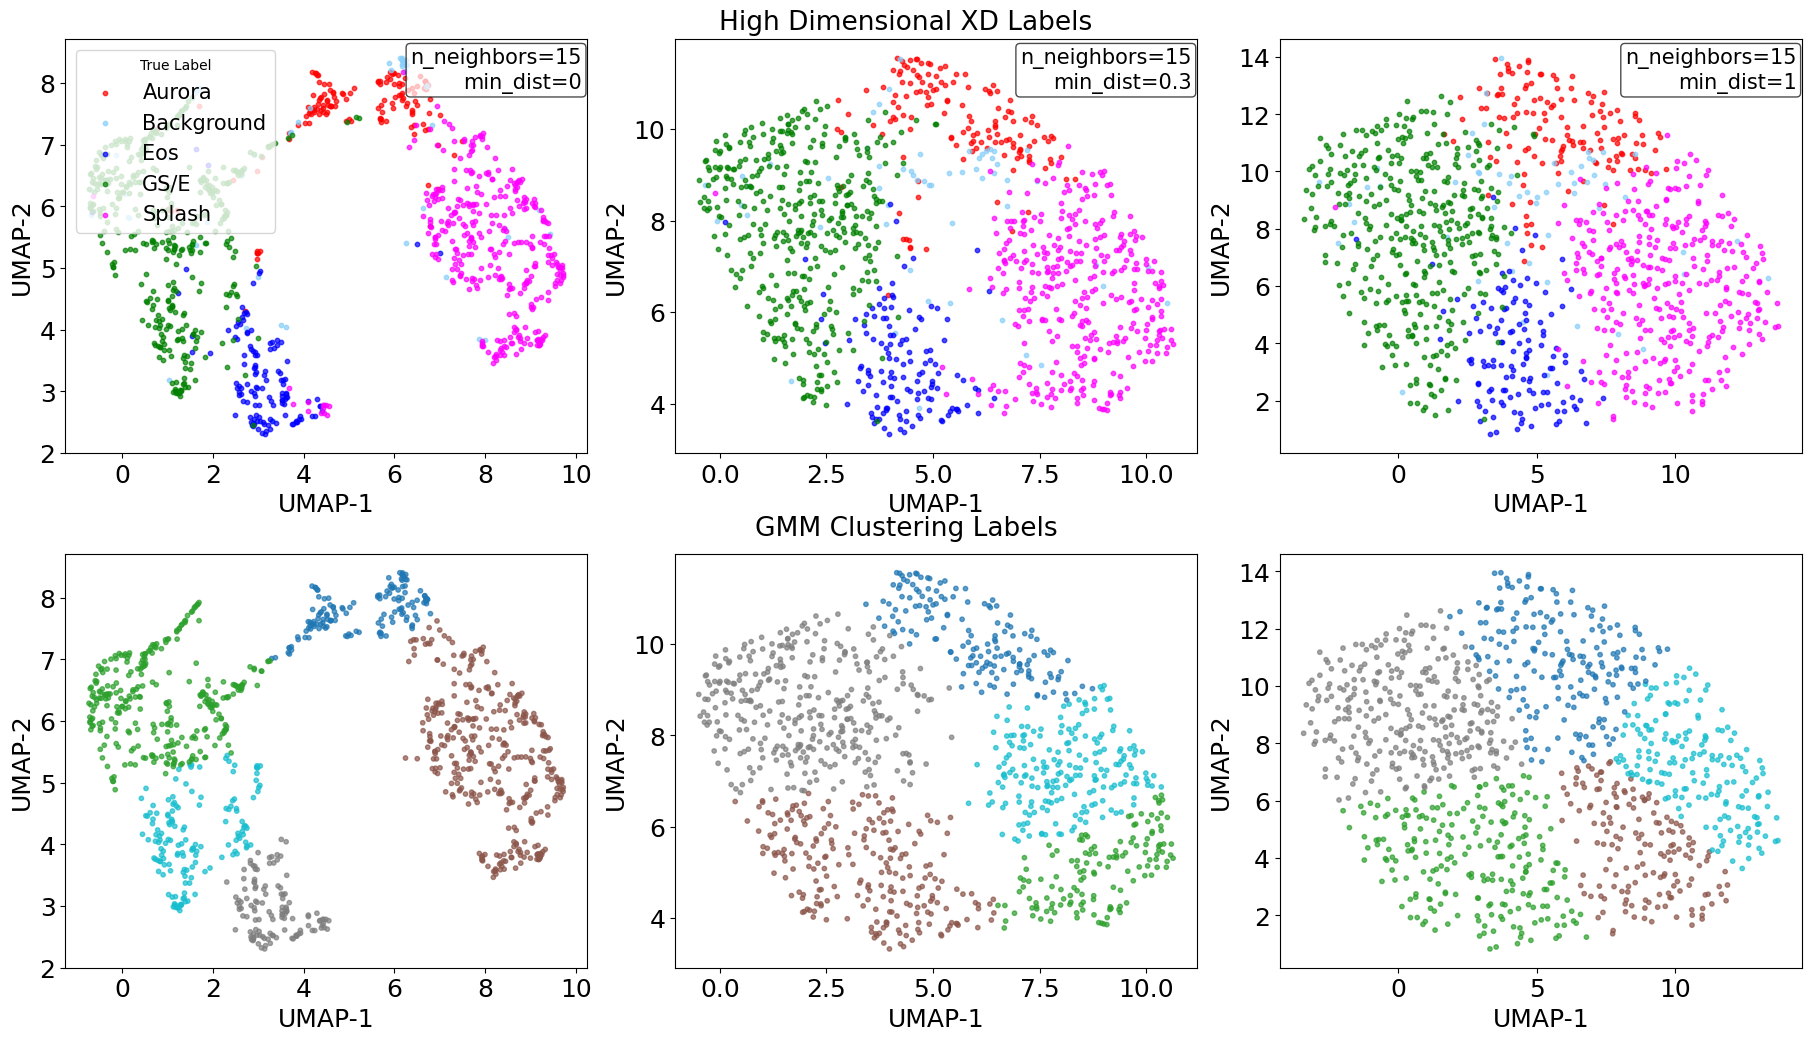

In [19]:
investigate_umap(
    table_path=galah_assigned_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=5
)

## **In this Notebook:**

We analyse the stuctures' cohesion in low dimensional space only using 6 data features (equivelent to those used in APOGEE).
- The only major difference is we use Mn instead of Ce 


In [ ]:
# The follow data keys are incorprated into the analysis:
galah_data_keys = ['fe_h', 'alpha_fe', 'Al_fe', 'Mn_fe', 'Mg_Mn', 'Energy']
galah_data_error_keys = ['e_fe_h', 'e_alpha_fe', 'e_Al_fe', 'e_Mn_fe', 'e_Mg_Mn', 'e_Energy']

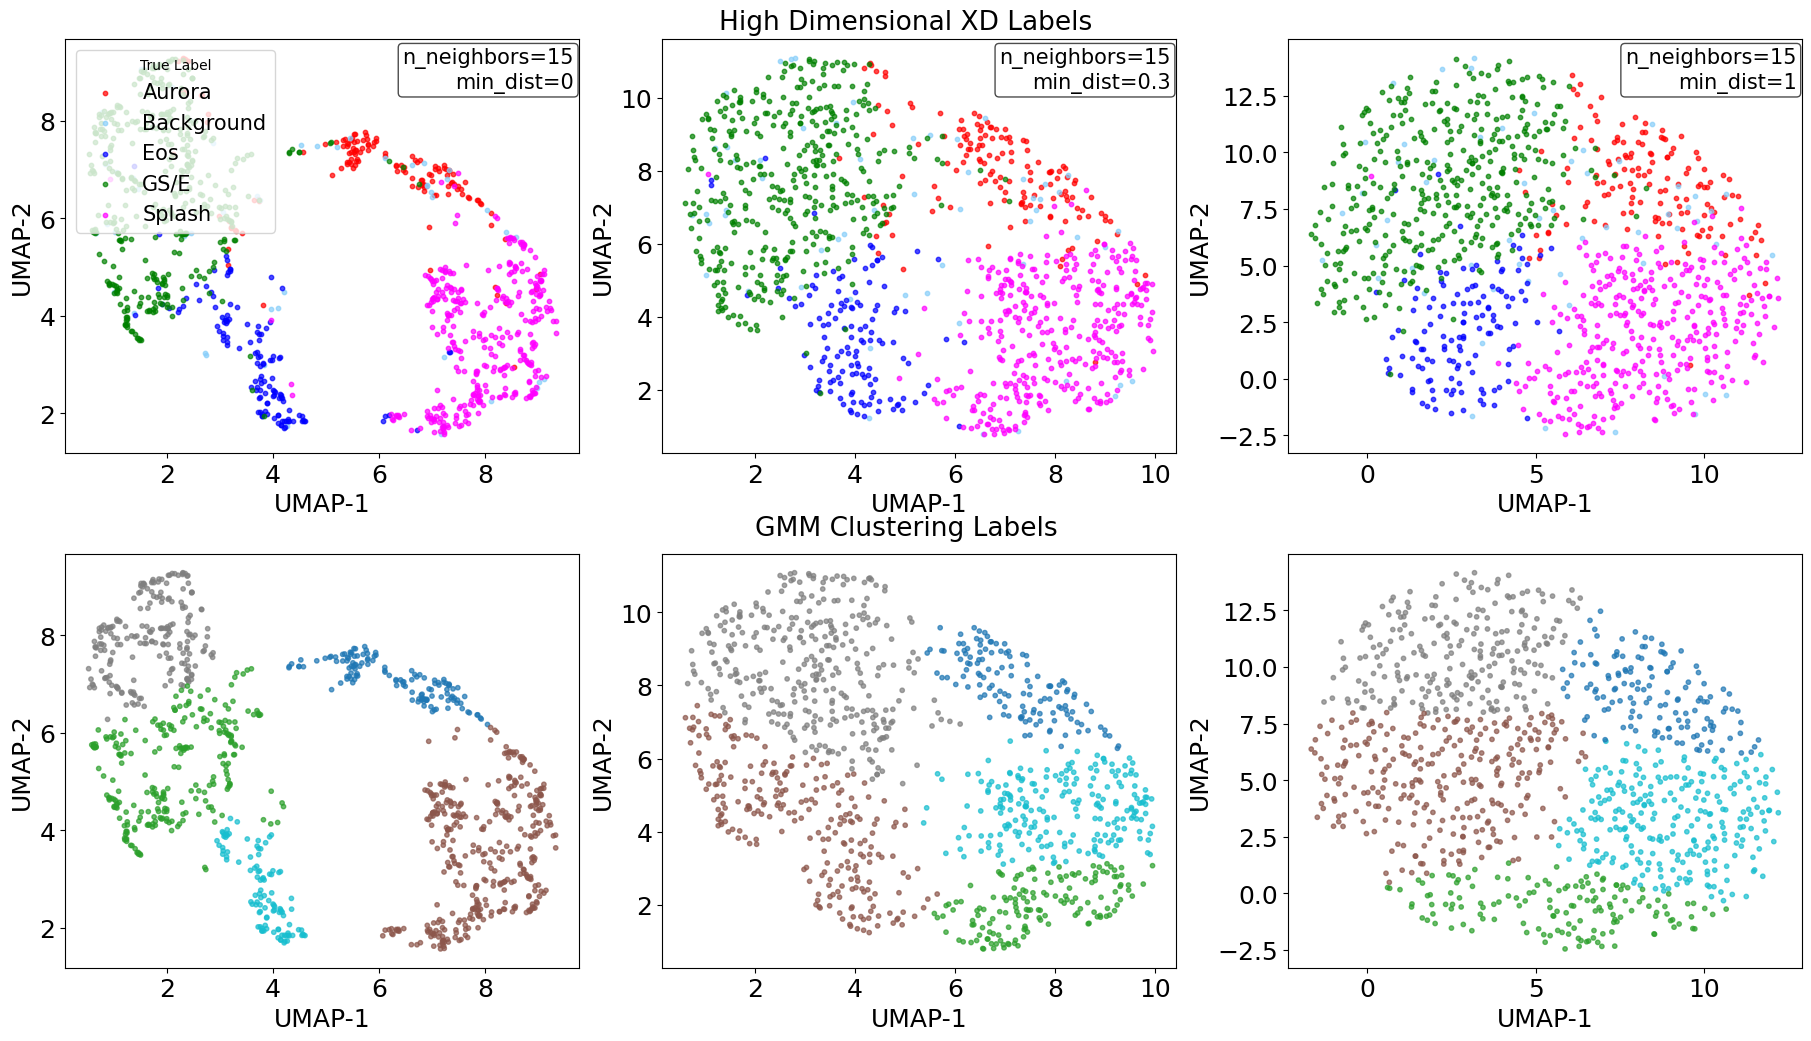

In [12]:
investigate_umap(
    table_path=galah_assigned_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=5
)

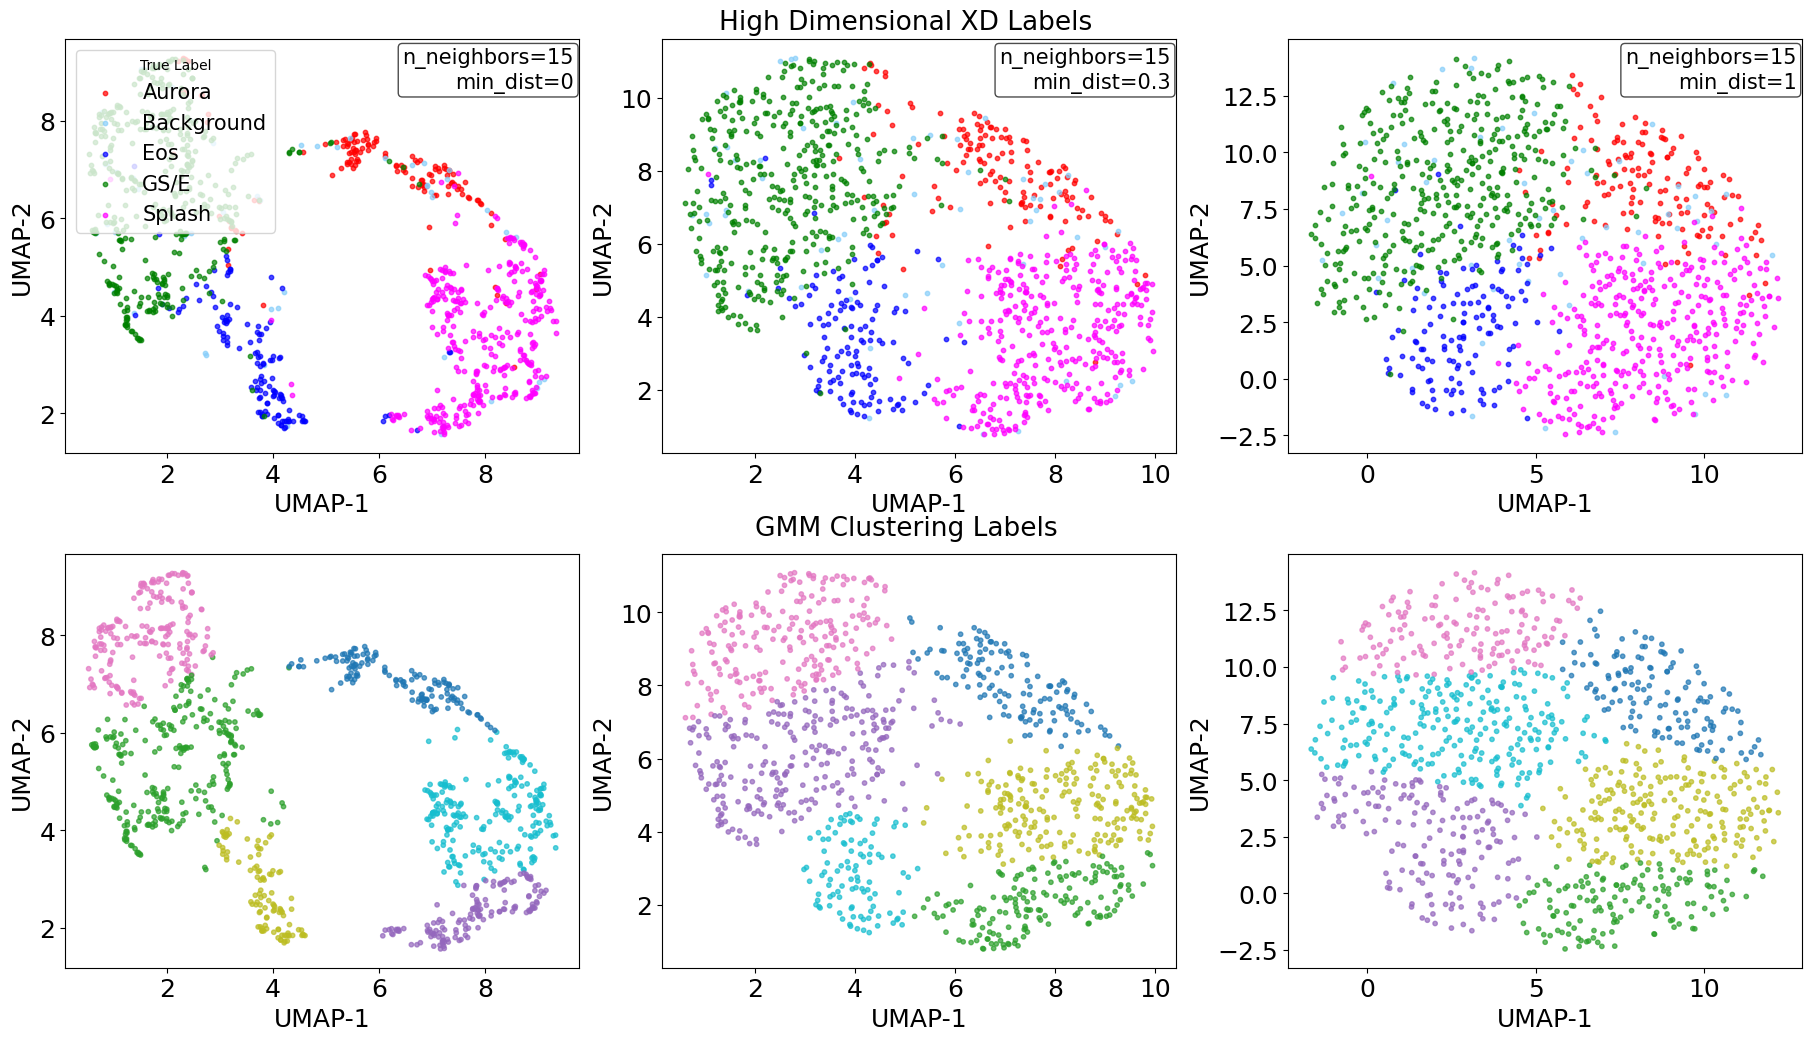

In [13]:
investigate_umap(
    table_path=galah_assigned_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=6
)

## **Initial results comparison**
- These two prelimary results show once again almost suprising levels of success at splitting the populations into these already investiagted components despite only being in 6 dimensional space.
- We note this is less successful than the 12 dimensional case 

| **No. Gaussian Componentss**   | **GS/E** | **Splash** | **Aurora** | **Eos** | **Background** | 
|---------------------------------|---------|---------|------------|------------|------------|
| **5 Components**          | 2 | 1| 0 | 1 | 0 | 
| **6 Components**          | 2 | 2| 1 | 1 | 0 | 

## **Applying the more riguorous pipeline:**

In [4]:
# Initalise the pipeline with the following UMAP
pipeline = ReducedGMMPipeline(galah_postXD, galah_data_keys, galah_data_error_keys, umap_dimensions = 2, umap_n_neighbors = 15, umap_min_dist = 0.0)
if not rerun_GMM:
    pipeline.umap_data = np.load("XD_Results/Galah/galah_6D_umap_space_13_6.npy")

In [5]:
# This will run the GMM fitting across multiple initialisation on the lower diemnsional dataset, this is not typically re-run to allow for fast reproduction
# It also allows constant colors and assignment to be demonstated 
if rerun_GMM:
    pipeline.run_GMM(gauss_component_range = (1, 10), n_init = 300, save_path = 'XD_Results/Galah/gallah_reducedGMM_13_6_6Dim.pkl')

## **Results from 5 Components**
- We retrieve this GS/E split again despite being from 6D projection

In [6]:
# A comparison of the GMM results on the lower dimensional data and the higher dimensional data
# In this I actually selection 4 gaussian features, this is not the best fit
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 5, save_path = 'XD_Results/Galah/gallah_reducedGMM_13_6_6Dim.pkl', display_full = False) 

 The following filters were applied: {'n_gauss': 5}
 Best BIC Score from filtered inputs: 8040.8616 occurred at:
   - Gaussian Components (n_gauss): 5


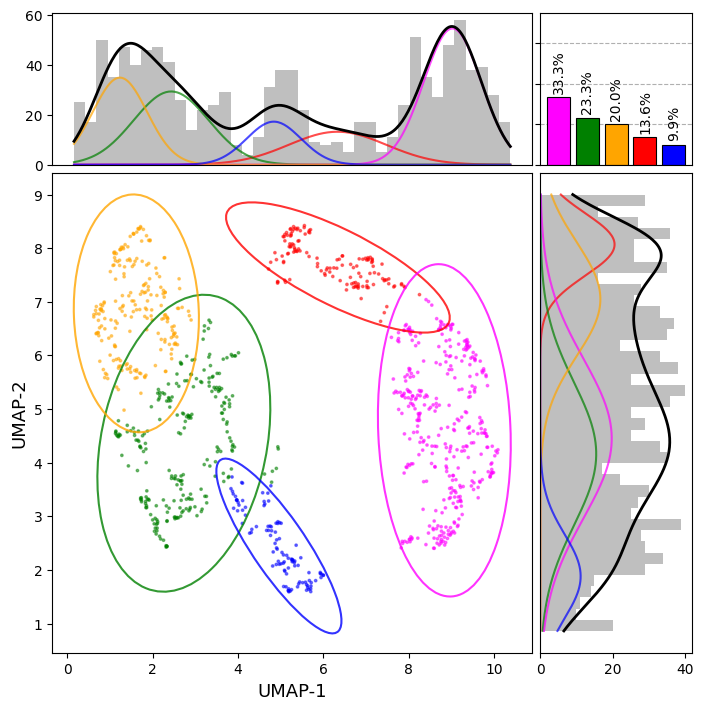

In [7]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["red", "green", "magenta", "orange", 'blue'])

In [11]:
labels = {
    1: "GS/E 1",
    3: "GS/E 2",
    2: "Splash",
    0: "Aurora",
    4: "Eos",
}
summary_table = pipeline.table_results_GMM(labels, combine = [[1,3]], labels_combined= ['GS/E'], deconvolve=True)


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+-------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Al_fe        | Mn_fe        | Mg_Mn       | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+=============+=======================+
|  0 | GS/E 1      |         23.3 |     247 |        23.3 | -0.85 ± 0.17 | 0.10 ± 0.07 | -0.13 ± 0.14 | -0.29 ± 0.05 | 0.38 ± 0.00 | -157893.88 ± 14988.30 |
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+-------------+-----------------------+
|  1 | GS/E 2      |         20   |     211 |        19.9 | -1.05 ± 0.12 | 0.12 ± 0.07 | -0.16 ± 0.11 | -0.43 ± 0.08 | 0.57 ± 0.00 | -145244.20 ± 18248.40 |
+-

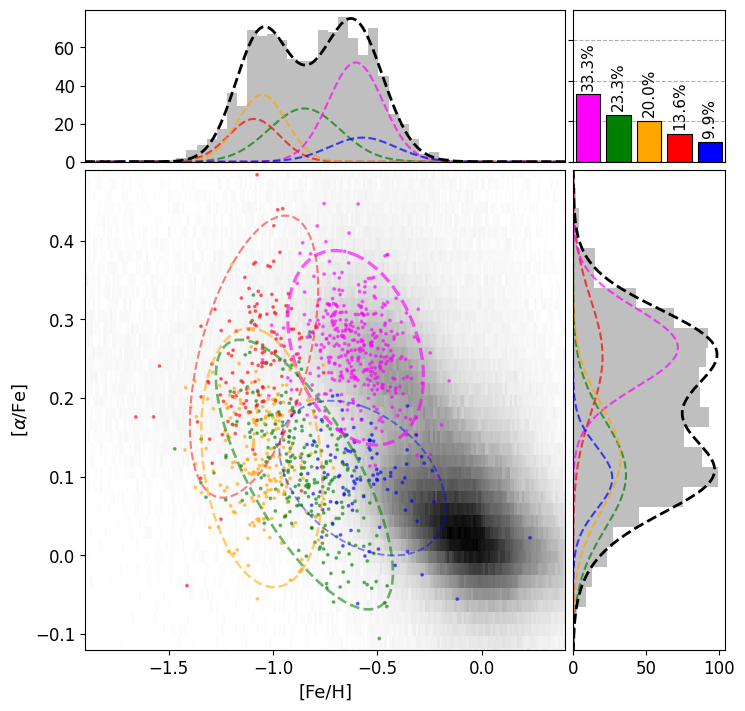

In [13]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["red", "green", "magenta", "orange", 'blue'],
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
    deconvolve=True,
)

## **Results from 6 Components**
- We achieve this rough splash split again 

In [14]:
# A comparison of the GMM results on the lower dimensional data and the higher dimensional data
# In this I actually selection 4 gaussian features, this is not the best fit
pipeline.compare_GMM(opt_metric='BIC', n_gauss_filter = 6, save_path = 'XD_Results/Galah/gallah_reducedGMM_8_6_dissmeeting.pkl', display_full = False) 

 The following filters were applied: {'n_gauss': 6}
 Best BIC Score from filtered inputs: 7953.0993 occurred at:
   - Gaussian Components (n_gauss): 6


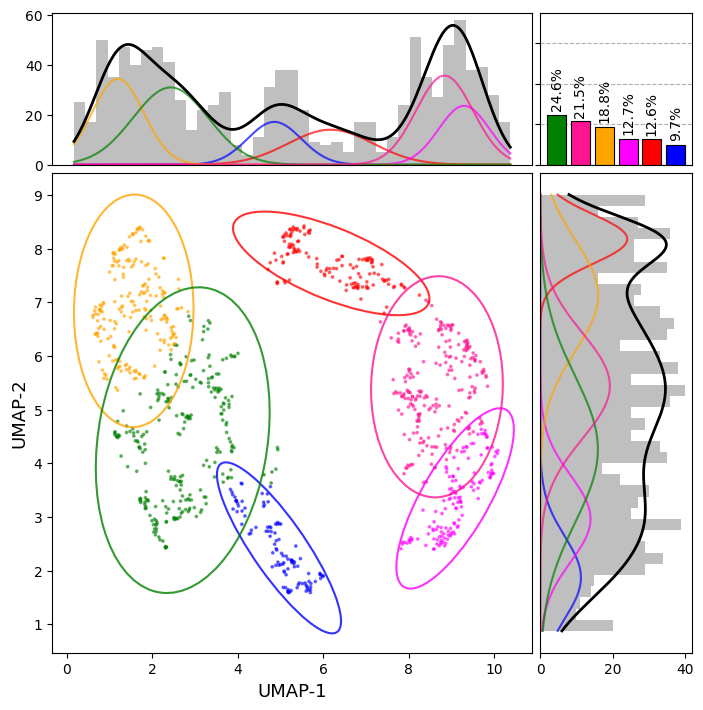

In [15]:
pipeline.plot_GMM_umap(z_score = 2.0, color_palette=["blue", "red", "magenta", "orange", 'green', 'deeppink'])

In [16]:
labels = {
    4: "GS/E 1",
    3: "GS/E 2",
    2: "Splash 1",
    5: "Splash 2",
    1: "Aurora",
    0: "Eos",
}
summary_table = pipeline.table_results_GMM(labels, combine = [[4,3], [2,5]], labels_combined= ['GS/E', 'Splash'], deconvolve=True)


Summary of GMM Components (from UMAP labels + weights)
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+-------------+-----------------------+
|    | Component   |   Weight (%) |   Count |   Count (%) | fe_h         | alpha_fe    | Al_fe        | Mn_fe        | Mg_Mn       | Energy                |
+====+=============+==============+=========+=============+==============+=============+==============+==============+=============+=======================+
|  0 | GS/E 1      |         24.6 |     258 |        24.3 | -0.85 ± 0.17 | 0.10 ± 0.07 | -0.13 ± 0.14 | -0.29 ± 0.05 | 0.38 ± 0.00 | -157804.78 ± 14787.32 |
+----+-------------+--------------+---------+-------------+--------------+-------------+--------------+--------------+-------------+-----------------------+
|  1 | GS/E 2      |         18.8 |     201 |        18.9 | -1.06 ± 0.11 | 0.12 ± 0.07 | -0.16 ± 0.11 | -0.44 ± 0.08 | 0.57 ± 0.00 | -144784.12 ± 18483.06 |
+-

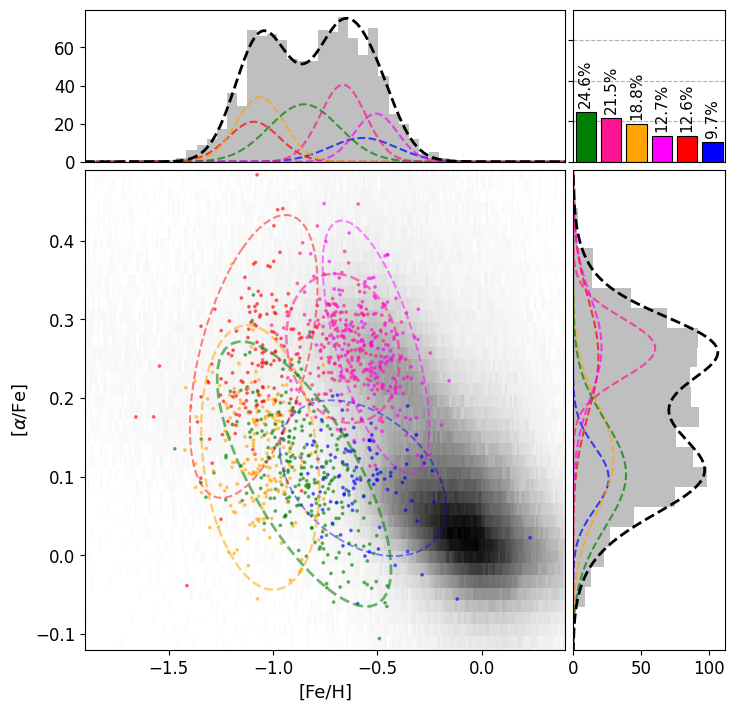

In [17]:
pipeline.plot_highdim_gaussian(x_key = 'fe_h', y_key='alpha_fe', 
    z_score = 2,
    full_survey_file= 'data/raw/Galah_DR3/GALAH_DR3_main_allstar_v3.fits',
    color_palette=["blue", "red", "magenta", "orange", 'green', 'deeppink'],
    xlim = (-1.9, 0.4), ylim=(-0.12, 0.49),
    deconvolve=True,
)

## **Results of this notebook:**
- Despite all of the discussion previously about APOGEE's advantages to GALAH, we seem to show that even in a fair comparison of using 6D space, GALAH has provided a more robust comparison representation and cohesion of our structure, in which we can still gain valuable insight to from a lower dimensional projection.
- This cannot be done for APOGEE
- It robustly asked the question, why is GALAH better at resolving these structures than APOGEE